########################################################################
#
# DATA ANALYSIS TEXTBOOK
# ILLUSTRATION STUDY FOR CHAPTER 8
#
# Measurement error, data cleaning
# data downloaded from a hotels price comparison site on October 27, 2017
#
########################################################################

In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"
# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch08-hotels-measurement-error/"
output = dirname + "da_case_studies/ch08-hotels-measurement-error/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Import the prewritten helper functions
from py_helper_functions import *

In [6]:
# load vienna
hotels=pd.read_csv(data_in+"hotels-vienna.csv")

#### SAMPLE SELECTION

In [7]:
hotels = (
    hotels.query('accommodation_type=="Hotel"')
    .query('city_actual=="Vienna"')
    .query("stars>=3 & stars<=4")
    .query("stars.notna()")
    .query("price<=600")
)

#######################################
### Look at measurement error by rating count
#######################################

In [8]:
hotels['lnprice']=np.log(hotels.price)

In [9]:
# define cutoffs
k1=100
k2=200

In [16]:
reg_me=smf.ols(formula='lnprice ~ rating',data=hotels.loc[hotels.rating_count<k1,:])
reg_me_fit=reg_me.fit()
print(reg_me_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.20
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           4.99e-06
Time:                        18:12:17   Log-Likelihood:                -6.3405
No. Observations:                  77   AIC:                             16.68
Df Residuals:                      75   BIC:                             21.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1375      0.285     11.025      0.0

In [18]:
hotels['yhat']=reg_me_fit.predict(hotels)

In [21]:
reg_me2=smf.ols(formula='lnprice ~ rating',data=hotels.loc[(hotels.rating_count>=k1)&(hotels.rating_count<k2),:])
reg_me_fit2=reg_me2.fit()
print(reg_me_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     13.52
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           0.000531
Time:                        18:17:27   Log-Likelihood:                -20.301
No. Observations:                  58   AIC:                             44.60
Df Residuals:                      56   BIC:                             48.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9129      0.482      6.038      0.0

In [22]:
hotels['yhat2']=reg_me_fit2.predict(hotels)

In [23]:
reg_me3=smf.ols(formula='lnprice ~ rating',data=hotels.loc[hotels.rating_count>=k2,:])
reg_me_fit3=reg_me3.fit()
print(reg_me_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     22.60
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.03e-05
Time:                        18:18:33   Log-Likelihood:                -4.1624
No. Observations:                  72   AIC:                             12.32
Df Residuals:                      70   BIC:                             16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3895      0.493      4.849      0.0

In [24]:
hotels['yhat3']=reg_me_fit3.predict(hotels)

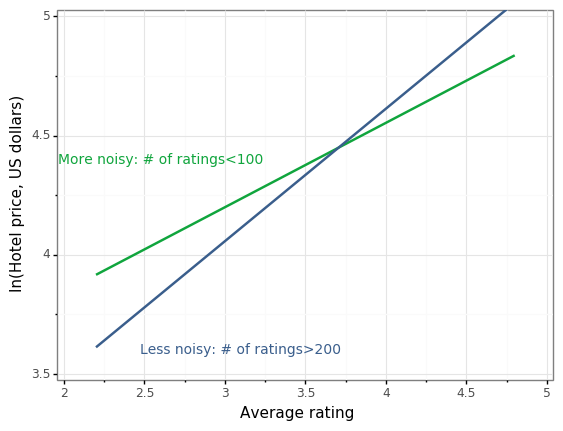

<ggplot: (8726982537177)>

In [41]:
ggplot(hotels) + geom_line(
    aes(x="rating", y="yhat"),color=color[1], size=1
) + geom_line(aes(x="rating", y="yhat3"),color=color[0], size=1)+ coord_cartesian(
    xlim=[2, 5], ylim=[3.5, 5]
) + expand_limits(
    x=0.01, y=0.01
) + scale_y_continuous(
    expand=[0.01, 0.01]
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[2, 5], breaks=seq(2, 5.1, 0.5)
) + labs(
    x="Average rating", y="ln(Hotel price, US dollars)"
) + theme_bw() + annotate(
    "text", x=2.6, y=4.4, label="More noisy: # of ratings<100", size=10, color=color[1]
) + annotate(
    "text", x=3.1, y=3.6, label="Less noisy: # of ratings>200", size=10, color=color[0]
)